In [143]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [144]:
def create_datasets(): #28*28*160
    #creat_dataset
    train_x = np.zeros([pic_size, 1])
    test_x = np.zeros([pic_size, 1])

    train_t = np.zeros([5, 1])
    test_t = np.zeros([5, 1])
    
    for fashion_mnist_idx in range(0, 5):
        data_x = np.zeros([pic_size, 1])
        for fashion_idx in range(0, 64):
            imgPath = 'Fashion_MNIST/' + '{fashion_mnist_idx}/{fashion_idx}.png'.format(fashion_mnist_idx=fashion_mnist_idx, fashion_idx=fashion_idx) 
            img = Image.open(imgPath)
            img_arr = np.array(img)
            img_arr = img_arr.reshape((img_arr.shape[0]*img_arr.shape[1], 1))
        
            #normalize
            sd = math.sqrt(np.var(img_arr))        
            mu = np.mean(img_arr)
            img_arr = (img_arr-mu)/sd
            
            #normalize
            data_x = np.concatenate((data_x, img_arr), axis=1)
        
        data_x = data_x[:, 1:]
        if(fashion_mnist_idx==0):
            data_ans=[[1], [0], [0], [0], [0]]
            data_repeat_32_01 = np.repeat(data_ans, 32, axis=1)
            train_t = np.concatenate((train_t, data_repeat_32_01), axis=1)
            test_t = np.concatenate((test_t, data_repeat_32_01), axis=1)
        elif(fashion_mnist_idx==1):
            data_ans=[[0], [1], [0], [0], [0]]
            data_repeat_32_02 = np.repeat(data_ans, 32, axis=1)
            train_t = np.concatenate((train_t, data_repeat_32_02), axis=1)
            test_t = np.concatenate((test_t, data_repeat_32_02), axis=1)
        elif(fashion_mnist_idx==2):
            data_ans=[[0], [0], [1], [0], [0]]
            data_repeat_32_03 = np.repeat(data_ans, 32, axis=1)
            train_t = np.concatenate((train_t, data_repeat_32_03), axis=1)
            test_t = np.concatenate((test_t, data_repeat_32_03), axis=1)
        elif(fashion_mnist_idx==3):
            data_ans=[[0], [0], [0], [1], [0]]
            data_repeat_32_04 = np.repeat(data_ans, 32, axis=1)
            train_t = np.concatenate((train_t, data_repeat_32_04), axis=1)
            test_t = np.concatenate((test_t, data_repeat_32_04), axis=1)
        elif(fashion_mnist_idx==4):
            data_ans=[[0], [0], [0], [0], [1]]
            data_repeat_32_05 = np.repeat(data_ans, 32, axis=1)
            train_t = np.concatenate((train_t, data_repeat_32_05), axis=1)
            test_t = np.concatenate((test_t, data_repeat_32_05), axis=1)
    
        train_x = np.concatenate((train_x, data_x[:, 0:32]), axis=1)
        test_x = np.concatenate((test_x, data_x[:, 32:64]), axis=1) 

    train_x = train_x[:, 1:]
    train_t = train_t[:, 1:]
    test_x = test_x[:, 1:] 
    test_t = test_t[:, 1:]
   
    return train_x, train_t, test_x, test_t


def shuffle_2D_matrix(matrix, seed, axis = 0):
    np.random.seed(seed)
    if axis == 0: # by column
        m = matrix.shape[1]
        permutation = list(np.random.permutation(m))
        shuffled_matrix = matrix[:, permutation]
    else:          # by row
        m = matrix.shape[0]
        permutation = list(np.random.permutation(m))
        shuffled_matrix = matrix[permutation, :]

    return shuffled_matrix

def training_GD(train_x, train_t, test_x, test_t, pic_size):   
    train_err = 100000
    test_err  = 100000  
    weight = np.zeros([5, pic_size]) 
    weightList = np.empty(weight.shape)

    learningRate = 0.00003
    train_errList = []
    train_accList = []

    test_errList = []
    test_accList = []
    epoch = 0
    while not(train_err<5 or epoch>100):
        #trainign part
        a_nk = np.dot(weight, train_x) #5 x 160
    
        #softmax transformation
        y_nk = (np.exp(a_nk) / np.sum(np.exp(a_nk), axis=0)) #5 x 160
   
        #update weight
        weight = weight + learningRate * np.dot((train_t- y_nk), train_x.T) #5 x 784
    
        #error function
        train_err = -np.sum(train_t*np.log(y_nk))
        train_errList.append(train_err)
    
        clasfi_train_y = np.argmax(y_nk, axis=0)
        clasfi_train_t = np.argmax(train_t, axis=0)
   
        train_accu = np.count_nonzero((clasfi_train_y-clasfi_train_t)==0)/y_nk.shape[1] #y_nk.shape[1]=160
        train_accList.append(train_accu)
    
        #testing part
        test_a = np.dot(weight, test_x) 
        test_y = np.exp(test_a) / np.sum(np.exp(test_a), axis=0)
        test_err = -np.sum(test_t*np.log(test_y))
        test_errList.append(test_err)
    
        clasfi_test_y = np.argmax(test_y, axis=0)
        clasfi_test_t = np.argmax(test_t, axis=0)
    
        test_accu = np.count_nonzero((clasfi_test_y-clasfi_test_t)==0)/y_nk.shape[1]
        test_accList.append(test_accu)
    
        epoch = epoch + 1
#     print(epoch)
#     print(len(train_errList))
#     print(len(train_accList))
#     print(len(test_errList ))
#     print(len(test_accList ))   

    return epoch, train_errList, train_accList, test_errList, test_accList

def training_with_batch_size(batch_size, itr_in_epoch, train_x, train_t, test_x, test_t, pic_size):   
    train_err = 100000
    test_err  = 100000  
    weight = np.zeros([5, pic_size]) 
    weightList = np.empty(weight.shape)

    learningRate = 0.00003
    train_errList = []
    train_accList = []

    test_errList = []
    test_accList = []
    epoch = 0
    
    while not(train_err<5 or epoch>100):
        #trainign part
        for i in range(0, itr_in_epoch):
            x = train_x[:, i:i+batch_size] #784 x 1
            t = train_t[:, i:i+batch_size] #5 x 1
            a_nk_SGD = np.dot(weight, x)  #5 x 1
        
            #softmax transformation 
            y_nk_SGD = (np.exp(a_nk_SGD) / np.sum(np.exp(a_nk_SGD), axis=0)) #5 x 1
            
            #update weight
            weight = weight + learningRate * np.dot((t - y_nk_SGD), x.T) #5 x 784
  
         
        #error function
        a_nk_SGD_160 = np.dot(weight, train_x) #5 x 160
        y_nk_SGD_160 = (np.exp(a_nk_SGD_160) / np.sum(np.exp(a_nk_SGD_160))) #5 x 160
    
        train_err = -np.sum(train_t*np.log(y_nk_SGD_160))
        train_errList.append(train_err)
    
        clasfi_train_y = np.argmax(y_nk_SGD_160, axis=0)
        clasfi_train_t = np.argmax(train_t, axis=0)
   
        train_accu = np.count_nonzero((clasfi_train_y-clasfi_train_t)==0)/y_nk_SGD_160.shape[1]
        train_accList.append(train_accu)
    
    
        #testing part
        test_ank = np.dot(weight, test_x) 
        test_ynk = np.exp(test_ank) / np.sum(np.exp(test_ank), axis=0)
        test_err = -np.sum(test_t*np.log(test_ynk))
        test_errList.append(test_err)
    
        clasfi_test_y = np.argmax(test_ynk, axis=0)
        clasfi_test_t = np.argmax(test_t, axis=0)
    
        test_accu = np.count_nonzero((clasfi_test_y-clasfi_test_t)==0)/test_ynk.shape[1]
        test_accList.append(test_accu)
        epoch = epoch + 1
    return epoch, train_errList, train_accList, test_errList, test_accList



def plot_result(pca_check, algor, epoch_num, train_errList, test_errList, train_accList, test_accList):
    plt.figure()
    if(algor==1 and pca_check==0):
        plt.title("Learning curve : Gradient Descent w/o PCA")
    elif(algor==1 and pca_check==1):
        plt.title("Learning curve : Gradient Descent with PCA")
    elif(algor==2 and pca_check==0):
        plt.title("Learning curve : SGD w/o PCA")
    elif(algor==2 and pca_check==1):
        plt.title("Learning curve : SGD with PCA")
    elif(algor==3 and pca_check==0):
        plt.title("Learning curve : mini-SGD w/o PCA")
    elif(algor==3 and pca_check==1):
        plt.title("Learning curve : mini-SGD with PCA")
    
    plt.plot(range(1, epoch_num+1), train_errList, label="train_error")
    plt.plot(range(1, epoch_num+1), test_errList, '--', label="test_error")
    plt.legend()
    
    plt.figure()
    if(algor==1 and pca_check==0):
        plt.title("Accurancy : Gradient Descent w/o PCA")
    elif(algor==1 and pca_check==1):
        plt.title("Accurancy : Gradient Descent with PCA")
    elif(algor==2 and pca_check==0):
        plt.title("Accurancy : SGD w/o PCA")
    elif(algor==2 and pca_check==1):
        plt.title("Accurancy : SGD with PCA")
    elif(algor==3 and pca_check==0):
        plt.title("Accurancy : mini-SGD w/o PCA")
    elif(algor==3 and pca_check==1):
        plt.title("Accurancy : mini-SGD with PCA")
    plt.plot(range(1, epoch_num+1), train_accList,      label="train_acc")
    plt.plot(range(1, epoch_num+1), test_accList, '--', label="test_acc")
    plt.legend()

def show_classification_result(pca_check, algor, train_accList, test_accList):
    print('╔════════════════════════╗')
    print('║ classification result  ║')
    print('╚════════════════════════╝')
    
    if(algor==1 and pca_check==0):
        print ('TYPE : Gradient Descent ')
        print ('w/o PCA ')
    elif(algor==1 and pca_check==1):
        print ('TYPE : Gradient Descent ')
        print ('with PCA ')
    elif(algor==2 and pca_check==0):
        print ('TYPE : SGD ')
        print ('w/o PCA ')
    elif(algor==2 and pca_check==1):
        print ('TYPE : SGD ')
        print ('with PCA ')
    elif(algor==3 and pca_check==0):
        print ('TYPE : mini-SGD ')
        print ('w/o PCA ')
    elif(algor==3 and pca_check==1):
        print ('TYPE : mini-SGD ')
        print ('with PCA ')  
    
    print ('Training accurancy :', train_accList[100])
    print ('Test accurancy     :', test_accList[100])
    
    
def make_PCA(x, d):
    x = x.T
    mean_ = np.mean(x, axis=0)
    U, S, V = np.linalg.svd(x, full_matrices=False)
    ud = U[:, :d]
    Ud = ud*S[:d]
    Vd = V[:d]
    explaned_variance_ = (S**2)/ (160-1)
    explaned_variance_ = explaned_variance_[:d]
    Img = np.dot(Ud, Vd) + mean_
    
    return Img.T, Ud.T

def plot_eigenvector(x, dimen):
    R = np.cov(x)
    eigen_vals, eigen_vecs = np.linalg.eigh(R)
    eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for i in range(len(eigen_vals))]
    eigen_pairs.sort(reverse=True) 
    for i in range(dimen):
        row = eigen_pairs[i][1][:, np.newaxis]
        plt.imshow(row.reshape(28,28), cmap='gray')
        plt.xticks(())
        plt.yticks(())
        plt.show()

## GD w/o PCA

╔════════════════════════╗
║    2-1.GD w/o PCA      ║
╚════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : Gradient Descent 
w/o PCA 
Training accurancy : 0.975
Test accurancy     : 0.91875


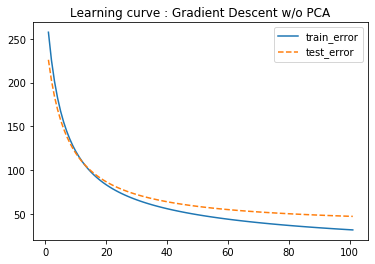

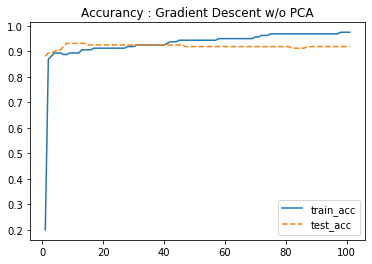

In [145]:
print('╔════════════════════════╗')
print('║    2-1.GD w/o PCA      ║')
print('╚════════════════════════╝')

pic_size = 28*28
train_x, train_t, test_x, test_t = create_datasets()

GD_train_errList = []
GD_train_accList = []
GD_test_errList  = []
GD_test_accList  = []

#training
epoch_num, GD_train_errList, GD_train_accList, GD_test_errList, GD_test_accList = training_GD(train_x, train_t, test_x, test_t, pic_size)
"""
    Argument:
        plot_result(x, y, epoch_num, GD_train_errList, GD_test_errList, GD_train_accList, GD_test_accList)
        show_classification_result(x, y, GD_train_accList, GD_test_accList)
        
        x :　w/o PCA --> 0, with PCA --> 0
        y :　GD --> 1, SGD --> 2, mini-SGD --> 3    
"""
#plot
plot_result(0, 1, epoch_num, GD_train_errList, GD_test_errList, GD_train_accList, GD_test_accList)
show_classification_result(0, 1, GD_train_accList, GD_test_accList)

## SGD w/o PCA

╔════════════════════════╗
║    2-1.SGD w/o PCA     ║
╚════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : SGD 
w/o PCA 
Training accurancy : 0.975
Test accurancy     : 0.91875


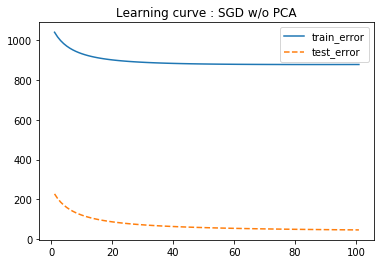

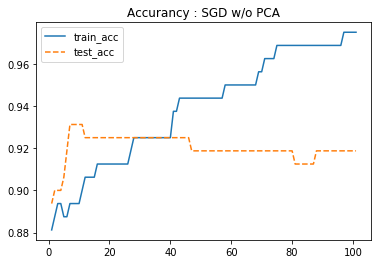

In [146]:
print('╔════════════════════════╗')
print('║    2-1.SGD w/o PCA     ║')
print('╚════════════════════════╝')

batch_size = 1
itr_in_epoch = 160

pic_size = 28*28
train_x, train_t, test_x, test_t = create_datasets()

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

SGD_train_errList = []
SGD_train_accList = []

SGD_test_errList = []
SGD_test_accList = []

#training
epoch_num, SGD_train_errList, SGD_train_accList, SGD_test_errList, SGD_test_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

"""
    Argument:
        plot_result(x, y, epoch_num, GD_train_errList, GD_test_errList, GD_train_accList, GD_test_accList)
        show_classification_result(x, y, GD_train_accList, GD_test_accList)
        
        x :　w/o PCA --> 0, with PCA --> 0
        y :　GD --> 1, SGD --> 2, mini-SGD -->3     
"""
#plot
plot_result(0, 2, epoch_num, SGD_train_errList, SGD_test_errList, SGD_train_accList, SGD_test_accList)
show_classification_result(0, 2, SGD_train_accList, SGD_test_accList)

## mini-batch

╔════════════════════════════╗
║    2-1.miniSGD w/o PCA     ║
╚════════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : mini-SGD 
w/o PCA 
Training accurancy : 0.925
Test accurancy     : 0.925


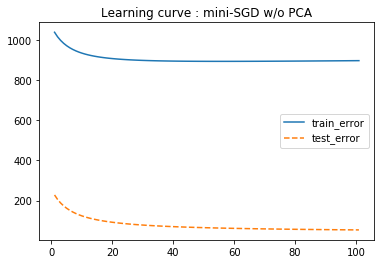

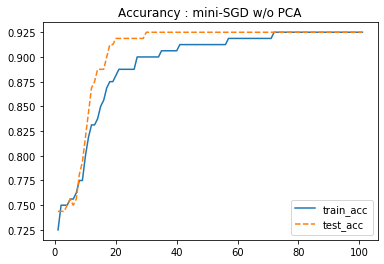

In [147]:
print('╔════════════════════════════╗')
print('║    2-1.miniSGD w/o PCA     ║')
print('╚════════════════════════════╝')
#mini SGD
pic_size = 28*28
batch_size = 32
itr_in_epoch = 5
train_x, train_t, test_x, test_t = create_datasets()

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

epoch = 0

train_miniSGD_errList = []
train_miniSGD_accList = []

test_miniSGD_errList = []
test_miniSGD_accList = []

#training
epoch_num, train_miniSGD_errList, train_miniSGD_accList, test_miniSGD_errList, test_miniSGD_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

"""
    Argument:
        plot_result(x, y, epoch_num, GD_train_errList, GD_test_errList, GD_train_accList, GD_test_accList)
        show_classification_result(x, y, GD_train_accList, GD_test_accList)
        
        x :　w/o PCA --> 0, with PCA --> 0
        y :　GD --> 1, SGD --> 2, mini-SGD -->3     
"""
#plot
plot_result(0, 3, epoch_num, train_miniSGD_errList, test_miniSGD_errList, train_miniSGD_accList, test_miniSGD_accList)
show_classification_result(0, 3, train_miniSGD_accList, test_miniSGD_accList)

## GD with PCA

In [148]:
print('╔═════════════════════╗')
print('║    2-2.with PCA     ║')
print('╚═════════════════════╝')

train_x, train_t, test_x, test_t = create_datasets()

print('╔═════════════════╗')
print('║ DIMENTION == 2  ║')
print('╚═════════════════╝')
train_x_PCA_2_IMG_orgi,  train_x_PCA_2_dimen2= make_PCA(train_x, 2)
test_x_PCA_2_IMG_orgi,  test_x_PCA_2_dimen2 = make_PCA(test_x, 2)

print(f'train_x_PCA_2_dimen2.shape = :{train_x_PCA_2_dimen2.shape}')
print(f'test_x_PCA_2_dimen2.shape  = :{test_x_PCA_2_dimen2.shape}')

train_x, train_t, test_x, test_t = create_datasets()

print('╔═════════════════╗')
print('║ DIMENTION == 5  ║')
print('╚═════════════════╝')
train_x_PCA_5_IMG_orgi,  train_x_PCA_5_dimen5= make_PCA(train_x, 5)
test_x_PCA_5_IMG_orgi,  test_x_PCA_5_dimen5= make_PCA(test_x, 5)

print(f'train_x_PCA_5_dimen5.shape = :{train_x_PCA_5_dimen5.shape}')
print(f'test_x_PCA_5_dimen5.shape  = :{test_x_PCA_5_dimen5.shape}')

train_x, train_t, test_x, test_t = create_datasets()
print('╔═════════════════╗')
print('║ DIMENTION == 10 ║')
print('╚═════════════════╝')

train_x_PCA_10_IMG_orgi,  train_x_PCA_10_dimen10= make_PCA(train_x, 10)
test_x_PCA_10_IMG_orgi,  test_x_PCA_10_dimen10= make_PCA(test_x, 10)

print(f'train_x_PCA_10_dimen10.shape = :{train_x_PCA_10_dimen10.shape}')
print(f'test_x_PCA_10_dimen10.shape  = :{test_x_PCA_10_dimen10.shape}')

╔═════════════════════╗
║    2-2.with PCA     ║
╚═════════════════════╝
╔═════════════════╗
║ DIMENTION == 2  ║
╚═════════════════╝
train_x_PCA_2_dimen2.shape = :(2, 160)
test_x_PCA_2_dimen2.shape  = :(2, 160)
╔═════════════════╗
║ DIMENTION == 5  ║
╚═════════════════╝
train_x_PCA_5_dimen5.shape = :(5, 160)
test_x_PCA_5_dimen5.shape  = :(5, 160)
╔═════════════════╗
║ DIMENTION == 10 ║
╚═════════════════╝
train_x_PCA_10_dimen10.shape = :(10, 160)
test_x_PCA_10_dimen10.shape  = :(10, 160)


╔═════════════════════════╗
║    2-2.GD with PCA 2    ║
╚═════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : Gradient Descent 
with PCA 
Training accurancy : 0.5875
Test accurancy     : 0.59375


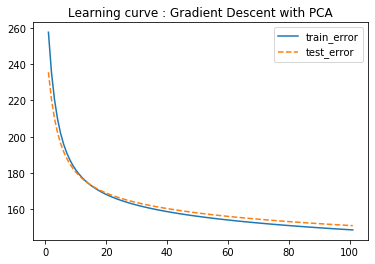

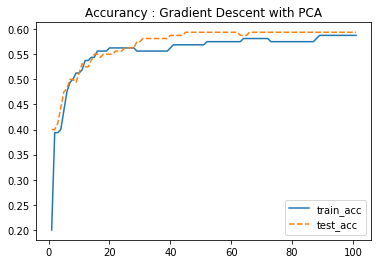

In [149]:
print('╔═════════════════════════╗')
print('║    2-2.GD with PCA 2    ║')
print('╚═════════════════════════╝')

pic_size = 2
train_x = train_x_PCA_2_dimen2
train_t = train_t
test_x = test_x_PCA_2_dimen2
test_t = test_t

GD_train_errList = []
GD_train_accList = []
GD_test_errList  = []
GD_test_accList  = []

#training
epoch_num, GD_train_errList, GD_train_accList, GD_test_errList, GD_test_accList = training_GD(train_x, train_t, test_x, test_t, pic_size)

#plot
plot_result(1, 1, epoch_num, GD_train_errList, GD_test_errList, GD_train_accList, GD_test_accList)
show_classification_result(1, 1, GD_train_accList, GD_test_accList)

╔═════════════════════════╗
║    2-2.GD with PCA 5    ║
╚═════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : Gradient Descent 
with PCA 
Training accurancy : 0.86875
Test accurancy     : 0.10625


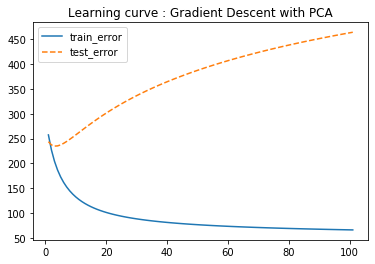

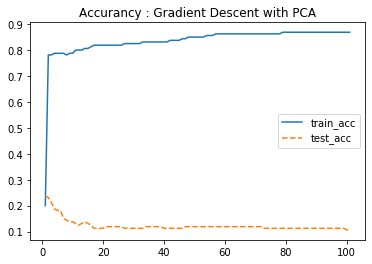

In [150]:
print('╔═════════════════════════╗')
print('║    2-2.GD with PCA 5    ║')
print('╚═════════════════════════╝')

pic_size = 5
train_x = train_x_PCA_5_dimen5
train_t = train_t
test_x  = test_x_PCA_5_dimen5
test_t  = test_t

GD_train_errList = []
GD_train_accList = []
GD_test_errList  = []
GD_test_accList  = []

#training
epoch_num, GD_train_errList, GD_train_accList, GD_test_errList, GD_test_accList = training_GD(train_x, train_t, test_x, test_t, pic_size)

#plot
plot_result(1, 1, epoch_num, GD_train_errList, GD_test_errList, GD_train_accList, GD_test_accList)
show_classification_result(1, 1, GD_train_accList, GD_test_accList)

╔══════════════════════════╗
║    2-2.GD with PCA 10    ║
╚══════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : Gradient Descent 
with PCA 
Training accurancy : 0.9125
Test accurancy     : 0.0625


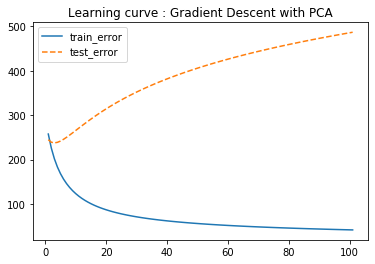

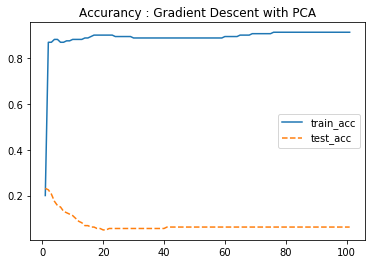

In [151]:
print('╔══════════════════════════╗')
print('║    2-2.GD with PCA 10    ║')
print('╚══════════════════════════╝')

pic_size = 10
train_x = train_x_PCA_10_dimen10
train_t = train_t
test_x = test_x_PCA_10_dimen10
test_t = test_t

GD_train_errList = []
GD_train_accList = []
GD_test_errList  = []
GD_test_accList  = []

#training
epoch_num, GD_train_errList, GD_train_accList, GD_test_errList, GD_test_accList = training_GD(train_x, train_t, test_x, test_t, pic_size)

#plot
plot_result(1, 1, epoch_num, GD_train_errList, GD_test_errList, GD_train_accList, GD_test_accList)
show_classification_result(1, 1, GD_train_accList, GD_test_accList)

╔═════════════════════════╗
║    2-2.SGD with PCA 2   ║
╚═════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : SGD 
with PCA 
Training accurancy : 0.5875
Test accurancy     : 0.58125


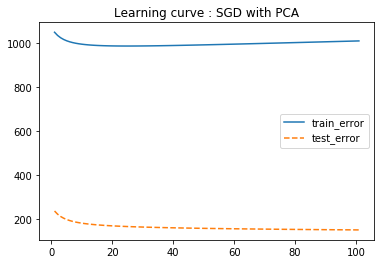

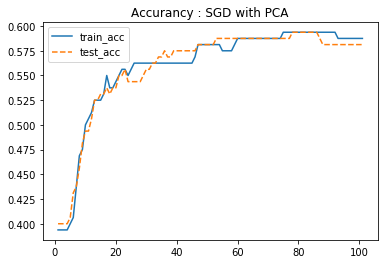

In [152]:
print('╔═════════════════════════╗')
print('║    2-2.SGD with PCA 2   ║')
print('╚═════════════════════════╝')

batch_size = 1
itr_in_epoch = 160

pic_size = 2
train_x = train_x_PCA_2_dimen2
train_t = train_t
test_x = test_x_PCA_2_dimen2
test_t = test_t

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

SGD_train_errList = []
SGD_train_accList = []

SGD_test_errList = []
SGD_test_accList = []

#training
epoch_num, SGD_train_errList, SGD_train_accList, SGD_test_errList, SGD_test_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

#plot
plot_result(1, 2, epoch_num, SGD_train_errList, SGD_test_errList, SGD_train_accList, SGD_test_accList)
show_classification_result(1, 2, SGD_train_accList, SGD_test_accList)

╔══════════════════════════╗
║    2-2.SGD with PCA 5    ║
╚══════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : SGD 
with PCA 
Training accurancy : 0.86875
Test accurancy     : 0.1125


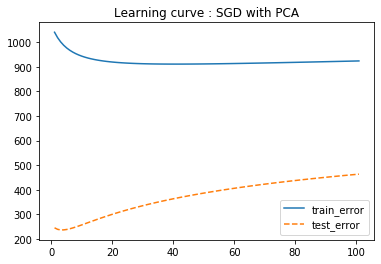

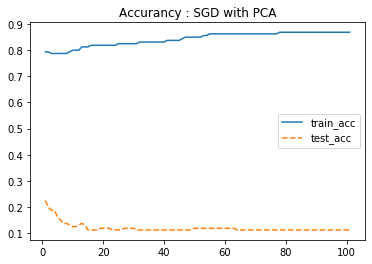

In [153]:
print('╔══════════════════════════╗')
print('║    2-2.SGD with PCA 5    ║')
print('╚══════════════════════════╝')

batch_size = 1
itr_in_epoch = 160

pic_size = 5
train_x = train_x_PCA_5_dimen5
train_t = train_t
test_x = test_x_PCA_5_dimen5
test_t = test_t

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

SGD_train_errList = []
SGD_train_accList = []

SGD_test_errList = []
SGD_test_accList = []

#training
epoch_num, SGD_train_errList, SGD_train_accList, SGD_test_errList, SGD_test_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

#plot
plot_result(1, 2, epoch_num, SGD_train_errList, SGD_test_errList, SGD_train_accList, SGD_test_accList)
show_classification_result(1, 2, SGD_train_accList, SGD_test_accList)

╔══════════════════════════╗
║    2-2.SGD with PCA 10   ║
╚══════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : SGD 
with PCA 
Training accurancy : 0.9125
Test accurancy     : 0.0625


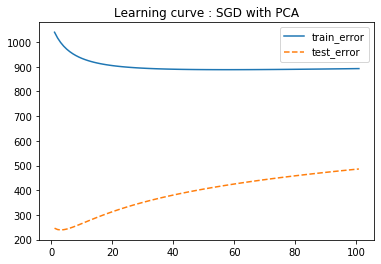

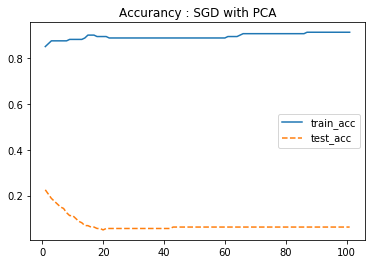

In [154]:
print('╔══════════════════════════╗')
print('║    2-2.SGD with PCA 10   ║')
print('╚══════════════════════════╝')

pic_size = 10
batch_size = 1
itr_in_epoch = 160

train_x = train_x_PCA_10_dimen10
train_t = train_t
test_x = test_x_PCA_10_dimen10
test_t = test_t

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

SGD_train_errList = []
SGD_train_accList = []

SGD_test_errList = []
SGD_test_accList = []

#training
epoch_num, SGD_train_errList, SGD_train_accList, SGD_test_errList, SGD_test_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

#plot
plot_result(1, 2, epoch_num, SGD_train_errList, SGD_test_errList, SGD_train_accList, SGD_test_accList)
show_classification_result(1, 2, SGD_train_accList, SGD_test_accList)

╔══════════════════════════════╗
║    2-2.miniSGD with PCA 2    ║
╚══════════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : SGD 
with PCA 
Training accurancy : 0.51875
Test accurancy     : 0.525


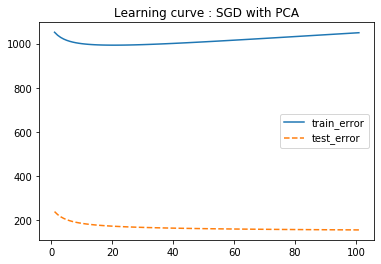

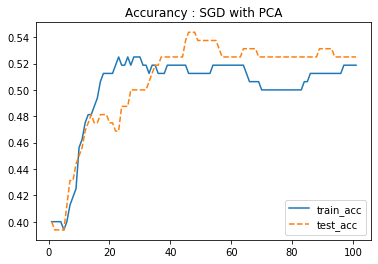

In [155]:
print('╔══════════════════════════════╗')
print('║    2-2.miniSGD with PCA 2    ║')
print('╚══════════════════════════════╝')
#mini SGD

pic_size = 2
batch_size = 32
itr_in_epoch = 5

train_x = train_x_PCA_2_dimen2
train_t = train_t
test_x = test_x_PCA_2_dimen2
test_t = test_t

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

SGD_train_errList = []
SGD_train_accList = []

SGD_test_errList = []
SGD_test_accList = []

#training
epoch_num, SGD_train_errList, SGD_train_accList, SGD_test_errList, SGD_test_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

#plot
plot_result(1, 2, epoch_num, SGD_train_errList, SGD_test_errList, SGD_train_accList, SGD_test_accList)
show_classification_result(1, 2, SGD_train_accList, SGD_test_accList)

╔═════════════════════════════╗
║    2-2.miniSGD with PCA 5   ║
╚═════════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : SGD 
with PCA 
Training accurancy : 0.65625
Test accurancy     : 0.1125


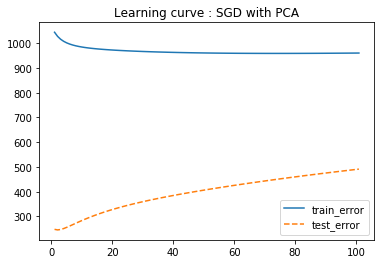

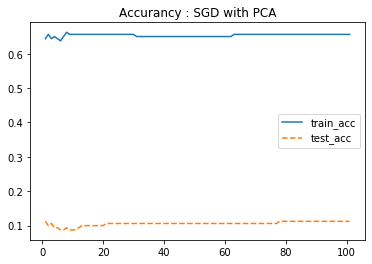

In [156]:
print('╔═════════════════════════════╗')
print('║    2-2.miniSGD with PCA 5   ║')
print('╚═════════════════════════════╝')
#mini SGD

pic_size = 5
batch_size = 32
itr_in_epoch = 5

train_x = train_x_PCA_5_dimen5
train_t = train_t
test_x = test_x_PCA_5_dimen5
test_t = test_t

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

SGD_train_errList = []
SGD_train_accList = []

SGD_test_errList = []
SGD_test_accList = []

#training
epoch_num, SGD_train_errList, SGD_train_accList, SGD_test_errList, SGD_test_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

#plot
plot_result(1, 2, epoch_num, SGD_train_errList, SGD_test_errList, SGD_train_accList, SGD_test_accList)
show_classification_result(1, 2, SGD_train_accList, SGD_test_accList)

╔══════════════════════════════╗
║    2-2.miniSGD with PCA 10   ║
╚══════════════════════════════╝
╔════════════════════════╗
║ classification result  ║
╚════════════════════════╝
TYPE : SGD 
with PCA 
Training accurancy : 0.9125
Test accurancy     : 0.06875


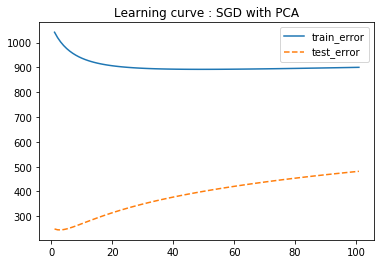

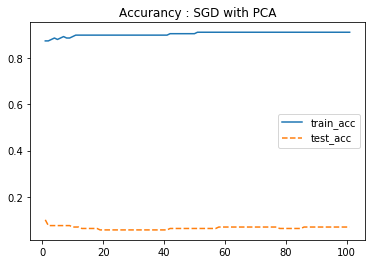

In [157]:
print('╔══════════════════════════════╗')
print('║    2-2.miniSGD with PCA 10   ║')
print('╚══════════════════════════════╝')
#mini SGD

pic_size = 10
batch_size = 32
itr_in_epoch = 5

train_x = train_x_PCA_10_dimen10
train_t = train_t
test_x = test_x_PCA_10_dimen10
test_t = test_t

seed = random.randint(1, 300)
train_x_SGD_shuffle = shuffle_2D_matrix(train_x, seed, axis=0)
train_t_SGD_shuffle = shuffle_2D_matrix(train_t, seed, axis=0)

SGD_train_errList = []
SGD_train_accList = []

SGD_test_errList = []
SGD_test_accList = []

#training
epoch_num, SGD_train_errList, SGD_train_accList, SGD_test_errList, SGD_test_accList = training_with_batch_size(batch_size, itr_in_epoch, train_x_SGD_shuffle, train_t_SGD_shuffle, test_x, test_t, pic_size)

#plot
plot_result(1, 2, epoch_num, SGD_train_errList, SGD_test_errList, SGD_train_accList, SGD_test_accList)
show_classification_result(1, 2, SGD_train_accList, SGD_test_accList)

dimension = 2


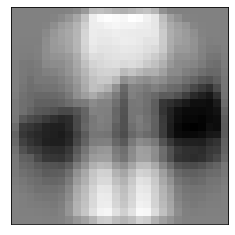

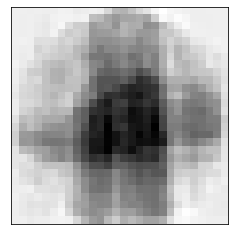

In [158]:
x_pca_2_total = np.concatenate((train_x_PCA_2_IMG_orgi, test_x_PCA_2_IMG_orgi),axis=1)
print("dimension = 2")
plot_eigenvector(x=x_pca_2_total, dimen=2)

dimension = 5


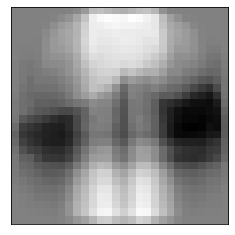

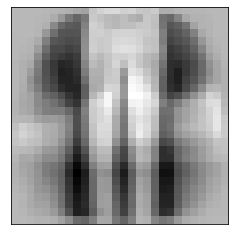

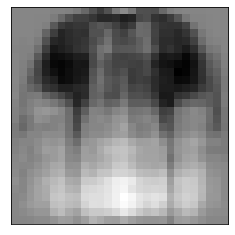

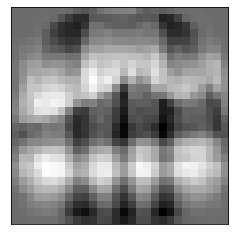

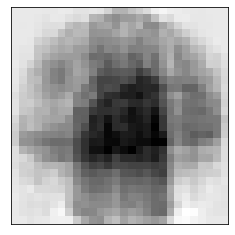

In [159]:
x_pca_5_total = np.concatenate((train_x_PCA_5_IMG_orgi, test_x_PCA_5_IMG_orgi),axis=1)
print("dimension = 5")
plot_eigenvector(x=x_pca_5_total, dimen=5)

dimension = 10


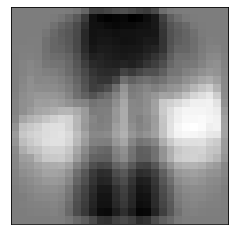

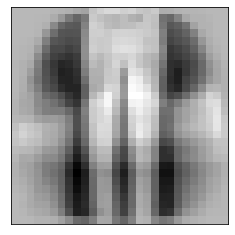

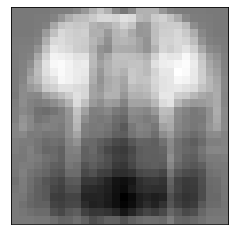

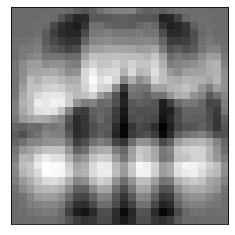

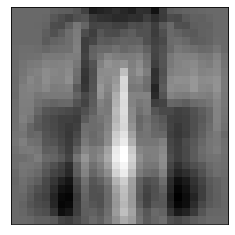

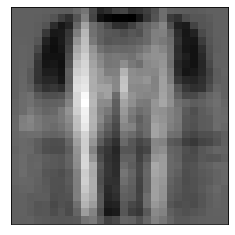

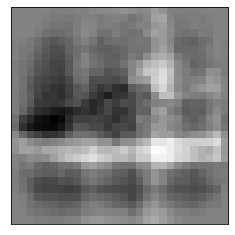

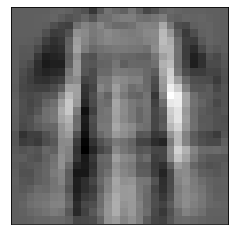

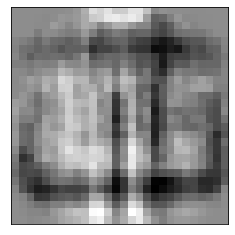

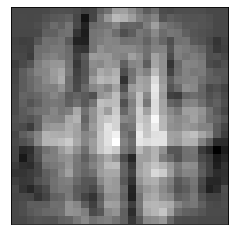

In [160]:
x_pca_10_total = np.concatenate((train_x_PCA_10_IMG_orgi, test_x_PCA_10_IMG_orgi),axis=1)
print("dimension = 10")
plot_eigenvector(x=x_pca_10_total, dimen=10)

In [161]:
print(train_x_PCA_2_dimen2.shape)
print(train_x_PCA_5_dimen5.shape)
print(train_x_PCA_10_dimen10.shape)


(2, 160)
(5, 160)
(10, 160)


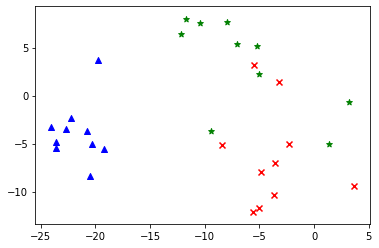

In [162]:
plt.scatter(train_x_PCA_2_dimen2.T[0:10, 0:1],   train_x_PCA_2_dimen2.T[0:10, 1:2], c='b', marker='^')
plt.scatter(train_x_PCA_5_dimen5.T[0:10, 1:2],   train_x_PCA_5_dimen5.T[0:10, 2:3], c='r', marker='x')
plt.scatter(train_x_PCA_10_dimen10.T[0:10, 2:3], train_x_PCA_10_dimen10.T[0:10, 3:4], c='g', marker='*')
plt.show()